In [1]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

IMAGE_PATH = './dataset/VGGFACE2/256/n000080/0033_01.png'

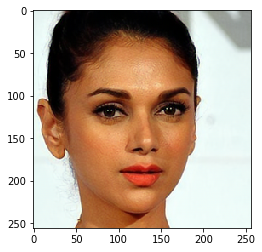

In [2]:
%matplotlib inline
img = Image.open(IMAGE_PATH)
# Print out the original image
imshow(img)

In [5]:
def color_augmentation(img: Image) -> Image:
    """Color Augmentation using PCA
    
    It performs PCA on the set of RGB pixel values 
    and add multiples of the found principal components
    with magnitudes proportional to the corresponding 
    eigenvalues times a random variable drawn from
    a Gaussian with mean zero and standard deviation 0.1.
    
    Reference: Alex Krizhevsky et. al., 
               ImageNet Classification with 
               Deep Convolutional Neural Networks, 2012.
    
    Args:
        img (PIL.Image): Input RGB image to be augmented.
    
    Returns:
        image with color augementation.
    """
    # Convert to normalized RGB vectors
    img = np.array(img)
    H, W, C = img.shape
    img_reshaped = img.reshape((H*W, C))
    img_centered = img_reshaped - np.mean(img_reshaped, axis=0)
    img_std = img_centered / np.std(img_centered, axis=0)

    # Get necessary components
    cov = np.cov(img_std, rowvar=False)
    lambdas, p = np.linalg.eig(cov)
    alpha = np.random.normal(0, 0.1, C)

    # Color Augmentation
    delta = np.dot(p, alpha*lambdas) * 255.
    img_augmented = np.maximum(np.minimum(img + delta, 255), 0).astype('uint8')
    
    return Image.fromarray(img_augmented)

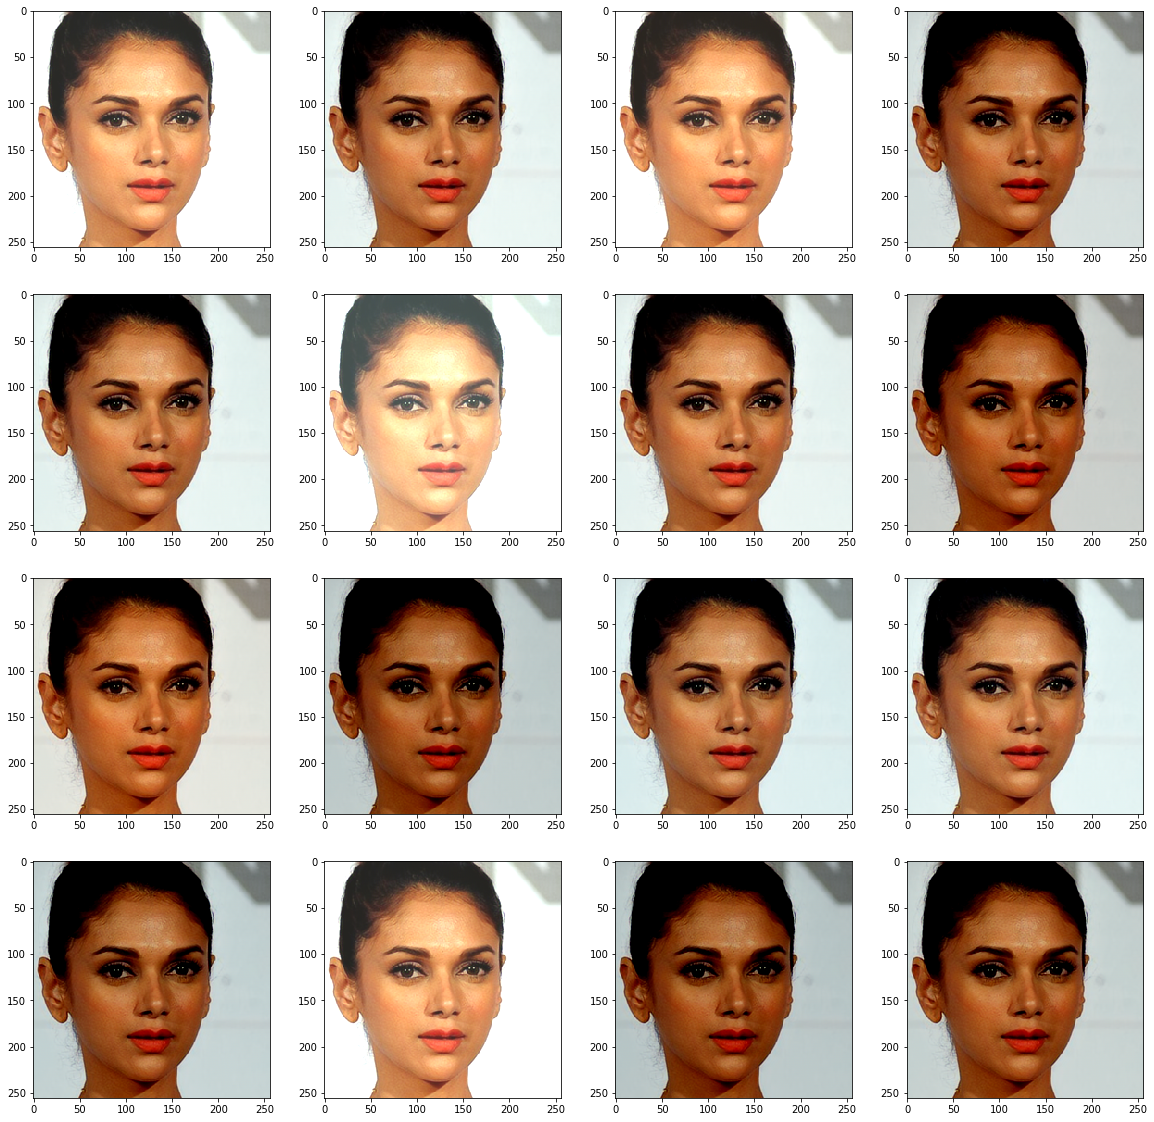

In [6]:
fig=plt.figure(figsize=(20, 20))
columns = 4
rows = 4
for i in range(1, columns*rows +1):
    img = Image.open(IMAGE_PATH)
    img = color_augmentation(img)
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()